<a href="https://colab.research.google.com/github/mcoto/ie0247/blob/main/IE0247_Tarea4_I_2024_Muestreo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muestreo y reconstrucción de señales



### Muestreo y reconstrucción de una señal coseno

El muestreo y la reconstrucción ideales de una señal analógica $x(t)$ se ilustran a continuación. Para facilitar la visualización, se considera una señal de coseno $x(t) = \cos(\omega_0 t)$. En primer lugar, se definen dos funcionesen Python que muestrean idealmente la señal $x(t)$ en instantes de tiempo equidistantes $t = kT$ y calculan la señal reconstruida $y(t)$ a partir de las muestras.

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

t = sym.symbols('t', real=True)
k = sym.symbols('k', integer=True)


def ideal_sampling(x, k, w_s):
    kappa = sym.symbols('kappa')
    xs = sym.lambdify(kappa, x.subs(t, kappa * 2 * sym.pi / w_s))
    return [xs(kappa) for kappa in k]


def ideal_reconstruction(xs, k, w_s):
    T = 2*sym.pi/w_s
    return sum(xs[n] * sym.sinc(sym.pi / T * (t - k[n] * T)) for n in range(len(k)))

Además, una función para la gráfica de lo muestreado y su reconstrucción


In [ ]:
def plot_signals(xs, y, w_s, k):

    plt.stem(k*2*np.pi/w_s, xs)
    plt.xlabel('$t$ in s')
    plt.ylabel('$x_s[k] = x_s(kT)$')
    plt.axis([0, 5, -1.2, 1.2])

    sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$', ylim=(-1.2, 1.2))

Ahora la señal continua $x(t) = \cos(\omega_0 t)$ que se va a muestrear y reconstruir se define y representa gráficamente para $\omega_0 = 5$.

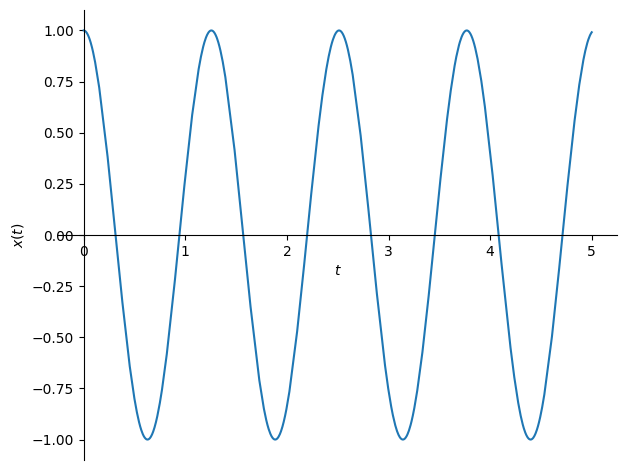

In [ ]:
w_0 = 5
x = sym.cos(w_0 * t)

sym.plot(x, (t, 0, 5), xlabel=r'$t$', ylabel=r'$x(t)$')

Primero se ilustra el caso de muestreo $\omega_\text{s} > 2 \cdot \omega_0$ con $\omega_\text{s} = 50$

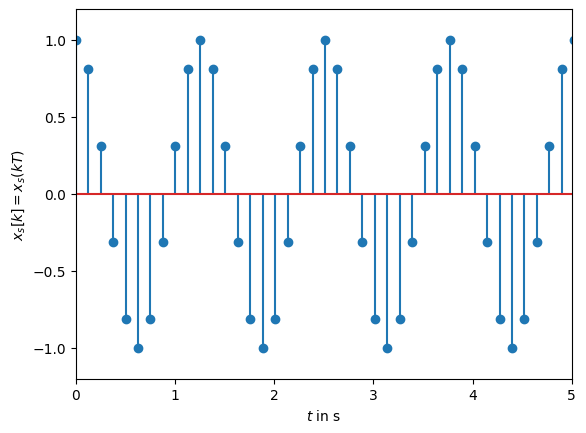

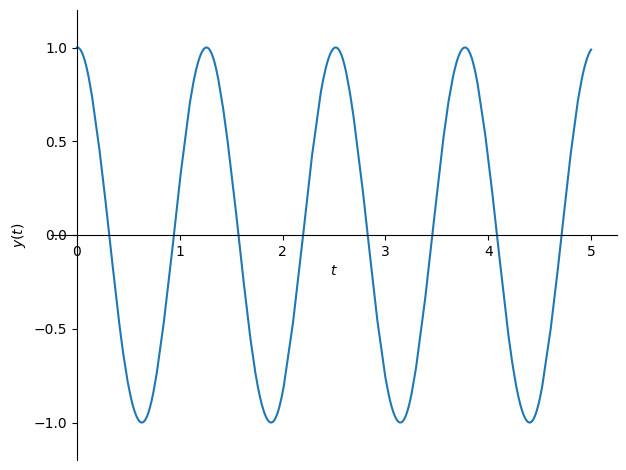

In [ ]:
k = np.arange(-100, 100)

w_s = 50
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)

Luego se ilustra el caso de muestreo crítico $\omega_\text{s} = 2 \cdot \omega_0$ con $\omega_\text{s} = 10$



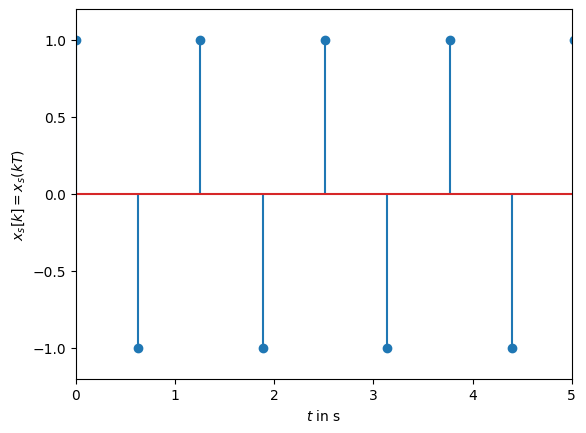

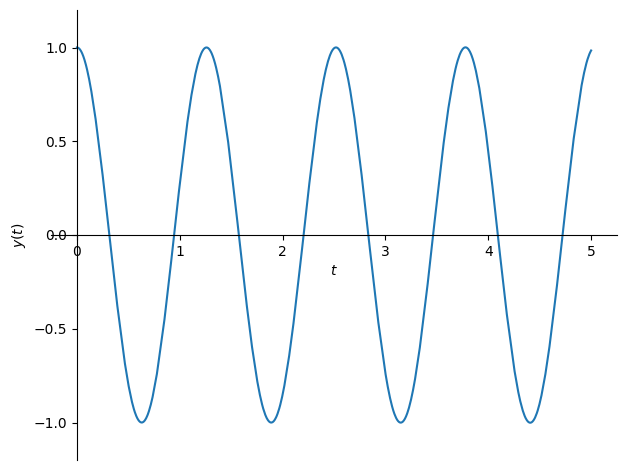

In [ ]:
w_s = 10
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)

Finalmente se ilustra el caso de submuestreo $\omega_\text{s} < 2 \cdot \omega_0$ con $\omega_\text{s} = 7$

<ipython-input-2-6469f4e2a697>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k*2*np.pi/w_s, xs)


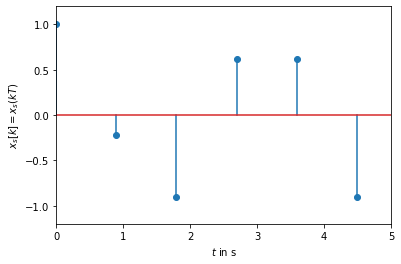

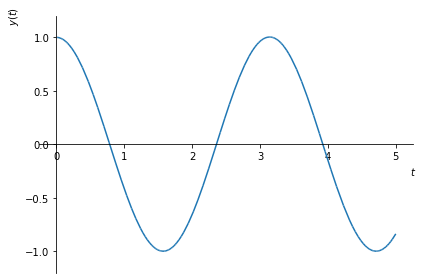

In [ ]:
w_s = 7
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)


**Copyright**
Este cuaderno ha sido adaptado de:[Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources).

The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.